### Support Vector Regressor:

1.  The main aim of the project is to build a complete end to end machine learning project where we need to predict the price of the house based on all the input features like crime rate, number of rooms, property tax rate.

2.  The main puprose of SVR is to predict all the continuous values  based on the concept of the support vector machines by defining the hyperplane along with its marginal plane that defines the best line of fit with a margin of tolerance.


### Steps performed by this algorithm:

1.   Import all the necessary libraries

2.   Load the dataset

3.   Explore EDA

4.   Divide the dataset into independent and dependent variables

5.   Divide the independent and dependent variables into training and testing data

6.   Perform Feature Scaling on the  data

7.   Train the model

8.   Predict the model on the test data

9.   Evaluate the model performance

10.  Visualize Actual vs Predicted Prices

### Step 1: Import all the necessary libraries

In [955]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing   import StandardScaler
from   sklearn.svm             import SVR
from   sklearn.metrics         import mean_absolute_error, mean_squared_error, root_mean_squared_error

### Step 2: Load the dataset

In [956]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"


df = pd.read_csv(url)

print(df)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

### OBSERVATIONS:

1.  All the input features of the dataset are crim , zn , indus , chas , nox , rm , age , dis, rad, tax, ptratio ,b,  lstat 

2. The output feature of the dataset is ['medv']----> price of the house.

### Step 3:  Explore EDA

In [957]:
### Get the total number of records used in the dataset

print("Total number of records used in the dataset is:", len(df))

Total number of records used in the dataset is: 506


In [958]:
### get the top five rows used in the dataset

print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [959]:
### get the bottom five rows used in the dataset

print(df.tail())

        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          b  lstat  medv  
501  391.99   9.67  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9  


In [960]:
### get the columns used in the dataset

print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [961]:
### get the information about the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [962]:
### get the descriptive statistics about the dataset

print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [963]:
### Check if there are any NULL Values in the dataset

print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


### OBSERVATIONS:

1. There are no NULL Values in the dataset.

In [964]:
### Check if there are any duplicate records in the dataset

df[df.duplicated()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


### OBSERVATIONS:

1.  There are no duplicate records in the dataset.

### Step 4:  Divide the dataset into independent and dependent variables

In [965]:
X = df.drop(columns='medv', axis=1)

Y = df['medv']

In [966]:
### Independent Variable

print(X)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [967]:
### Dependent Variable

print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


### Step 5:  Divide the independent and dependent variables into training and testing data

In [968]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [969]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [970]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86


In [971]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (404, 13)
Shape of the input testing  data is: (102, 13)


In [972]:
Y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: medv, Length: 404, dtype: float64

In [973]:
Y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: medv, Length: 102, dtype: float64

In [974]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (404,)
Shape of the output testing  data is: (102,)


### Step 6: Perform Feature Scaling on the  data

In [975]:
### Scale the inputs to make it in one range

from sklearn.preprocessing import StandardScaler

### call the object for StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled = sc.fit_transform(X_test)

In [976]:
X_train_scaled

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]], shape=(404, 13))

In [977]:
X_test_scaled

array([[-0.47678706, -0.44018634, -1.14921855, ..., -1.33894103,
         0.41308415, -0.60871618],
       [-0.48154797,  1.2289217 , -0.79642905, ..., -0.78082095,
         0.42860582, -1.3730385 ],
       [-0.47490641, -0.44018634,  2.39213032, ...,  0.61447927,
         0.3533257 ,  0.64388464],
       ...,
       [ 1.40372123, -0.44018634,  0.95107489, ...,  0.67029128,
        -3.58319267,  1.08083841],
       [-0.48216228, -0.44018634, -1.08344424, ..., -0.27851287,
         0.41851673, -0.07882303],
       [-0.47633711, -0.44018634,  0.16327799, ..., -0.16688885,
         0.27704776, -0.62258773]], shape=(102, 13))

### OBSERVATIONS:

1. After performing the feature scaling on the inputs, we can see that all the inputs has been scaled in one range.

### Step 7: Train the model

In [978]:
from sklearn.svm import SVR

### Call an objetc for SVR

svr = SVR(kernel = 'rbf', C = 0.1, gamma = 0.1, epsilon =0.1)


### use the object for svr to train the model
svr.fit(X_train_scaled, Y_train)

,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,C,0.1
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### OBSERVATIONS:

1. With the help of Support Vector Regressor object, the entire dataset is trained.

2. Then using the new test data, we can predict the price of the house.

3. The svr model is trained with the help of the following parameters:- 

    (a.)   kernel = 'rbf' -----------> It can handle the non-linear data.

    (b.)   C = 0.1        -----------> It is a regularization parameter that reduces the overfitting.

    (c.)   gamma          -----------> It determines how much influence can a single training parameter can cause

    (d.)   epsilon        -----------> It determines the margin of tolerance in which no penalty is given to the errors.

### Step 8: Predict the model on the test data

In [979]:
Y_pred = svr.predict(X_test_scaled)

In [980]:
Y_pred

array([23.33659272, 22.26777066, 19.57224196, 22.8911726 , 18.97497485,
       21.87773699, 20.57292482, 19.03770811, 19.95059078, 20.81569637,
       21.60046045, 21.66239077, 20.83405778, 22.13306432, 20.88026438,
       20.64487589, 20.26076038, 18.45981934, 23.00793735, 18.68584246,
       23.68696434, 24.31420651, 19.16439263, 21.74230703, 18.67635176,
       18.55967531, 22.25765426, 19.17778139, 21.58492963, 20.67441757,
       21.50772671, 23.06224732, 20.14577863, 19.70045557, 18.42327165,
       20.68895243, 24.40830052, 21.71725712, 21.83748953, 22.99957971,
       19.54265277, 24.0859341 , 22.67782527, 21.60679895, 23.42975741,
       18.66143209, 19.35902807, 23.23603119, 19.42611356, 23.94509364,
       22.10840922, 24.12145964, 19.89204904, 22.37853012, 23.29720009,
       20.8740306 , 18.98101752, 23.68822705, 23.27350192, 20.5983667 ,
       23.09113416, 23.10684666, 24.04507724, 20.74800203, 22.58136588,
       21.15233481, 18.95041267, 23.68619968, 23.87172054, 19.03

In [981]:
Y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: medv, Length: 102, dtype: float64

In [982]:
Y_test_values = Y_test.values

In [983]:
Y_test_values

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [984]:
Y_pred

array([23.33659272, 22.26777066, 19.57224196, 22.8911726 , 18.97497485,
       21.87773699, 20.57292482, 19.03770811, 19.95059078, 20.81569637,
       21.60046045, 21.66239077, 20.83405778, 22.13306432, 20.88026438,
       20.64487589, 20.26076038, 18.45981934, 23.00793735, 18.68584246,
       23.68696434, 24.31420651, 19.16439263, 21.74230703, 18.67635176,
       18.55967531, 22.25765426, 19.17778139, 21.58492963, 20.67441757,
       21.50772671, 23.06224732, 20.14577863, 19.70045557, 18.42327165,
       20.68895243, 24.40830052, 21.71725712, 21.83748953, 22.99957971,
       19.54265277, 24.0859341 , 22.67782527, 21.60679895, 23.42975741,
       18.66143209, 19.35902807, 23.23603119, 19.42611356, 23.94509364,
       22.10840922, 24.12145964, 19.89204904, 22.37853012, 23.29720009,
       20.8740306 , 18.98101752, 23.68822705, 23.27350192, 20.5983667 ,
       23.09113416, 23.10684666, 24.04507724, 20.74800203, 22.58136588,
       21.15233481, 18.95041267, 23.68619968, 23.87172054, 19.03

In [985]:
df_compare = pd.DataFrame({
    "Y_test": Y_test_values                ,
    "Y_pred": Y_pred                       ,
    "Residual": (Y_test_values - Y_pred)
})

In [986]:
df_compare

,Y_test,Y_pred,Residual
0,23.6,23.336593,0.263407
1,32.4,22.267771,10.132229
2,13.6,19.572242,-5.972242
3,22.8,22.891173,-0.091173
4,16.1,18.974975,-2.874975
...,...,...,...
97,17.9,19.975454,-2.075454
98,9.6,19.093653,-9.493653
99,17.2,19.066021,-1.866021
100,22.5,22.378915,0.121085


### Step 9:  Evaluate the model performance

In [987]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)

mae = mean_absolute_error(Y_test, Y_pred)

rmse = root_mean_squared_error(Y_test, Y_pred)


print("Mean Squared Error is:", mse)

print("Mean Absolute Error is:", mae)

print("Root Mean Squared Error is:", rmse)

Mean Squared Error is: 57.51991352462679
Mean Absolute Error is: 4.714565526694789
Root Mean Squared Error is: 7.584188389315417


### Step 10:  Visualize Actual vs Predicted Prices

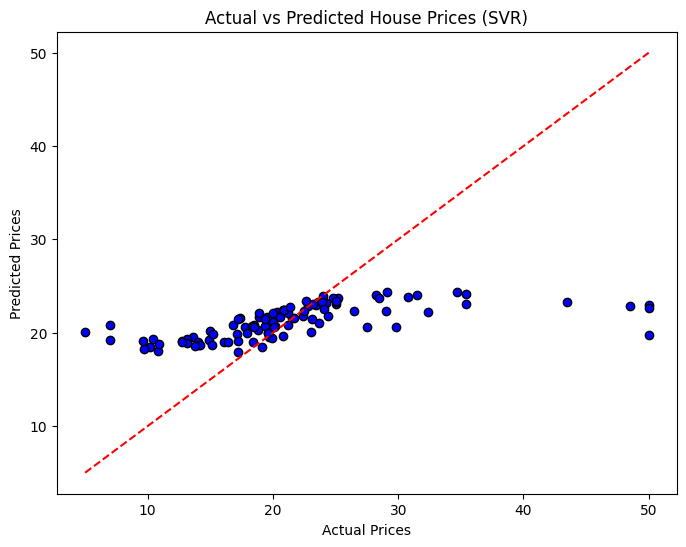

In [988]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, color='blue', edgecolors='k')
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (SVR)")
plt.show()

### Conclusions:

1.  The SVR model predictions are concentrated in a narrow range (~18–24), while actual prices span a much wider range.

2.  The model underfits the data, failing to learn the true relationship between features and house prices.

3.  High-priced houses are significantly underpredicted, indicating poor performance at the upper end.

4.  Predictions show a strong bias toward the mean, a common sign of excessive regularization or suboptimal hyperparameters.

5.  Data points are far from the ideal 45° line, reflecting weak agreement between actual and predicted values.

6.  The model captures general trends only for mid-range prices, but not extremes.

7.  Overall, the SVR model exhibits low predictive accuracy and limited generalization ability.